In [157]:
%matplotlib inline 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [158]:
DATADIR = '/home/sidd/Downloads/Semantic_Segmentation_Dataset/'
IMAGEDIR = os.path.join(DATADIR,'train/images/')
LABELDIR = os.path.join(DATADIR,'train/labels/')

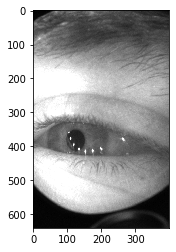

(640, 400)
000000002610.png


In [159]:
images = sorted(os.listdir(IMAGEDIR))
for img in images:  # can iterate over each image in image-directory -> use later
    img_array = cv2.imread(os.path.join(IMAGEDIR,img) ,cv2.IMREAD_GRAYSCALE)  #converts to numpy array
    #print(img_array)
    plt.imshow(img_array, cmap='gray')  #graph with color map gray scale
    plt.show()  #display
    break       #just get first sample image

print(img_array.shape)
print(images[0])

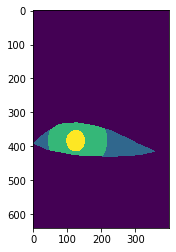

(640, 400)
000000002610.npy
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [160]:
#choose a label and plot -> given as numpy arrays

labels = sorted(os.listdir(LABELDIR))
#print(labels)
lbl_array = np.load(LABELDIR+labels[0]) #path to label
#plt.imshow(lbl_array, cmap='gray')  #graph with color map gray scale
plt.imshow(lbl_array)
plt.show()  #display

print(lbl_array.shape)
print(labels[0])

print(lbl_array)


2610samp.png was saved


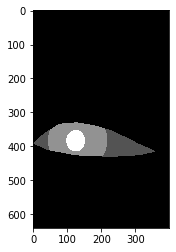


(640, 400)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


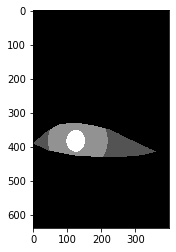

(639, 399)


In [161]:
# -- to remove black parts -- 
# try all the links given in txt file

import matplotlib 

img_name = "2610samp.png"
matplotlib.image.imsave(img_name, lbl_array)
print(img_name + " was saved")

image_arr = cv2.imread('2610samp.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image_arr, cmap='gray')  #graph with color map gray scale
plt.show()

print()

print(image_arr.shape)

def crop_image_only_outside(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    print(mask)
    m,n = img.shape
    mask0,mask1 = mask.any(0),mask.any(1)
    col_start,col_end = mask0.argmax(),n-mask0[::-1].argmax()-1
    row_start,row_end = mask1.argmax(),m-mask1[::-1].argmax()-1
    #print("ROW START :", row_start)
    #print("ROW END :", row_end)
    #print("COL START :", col_start)
    #print("COL END  :", col_end)
    return img[row_start:row_end,col_start:col_end]

cropped = crop_image_only_outside(image_arr,tol=0)

plt.imshow(cropped, cmap='gray')  #graph with color map gray scale
plt.show()

print(cropped.shape)

# well, that didn't work :/